In [53]:
import numpy as np
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [54]:
years = np.arange(2015,2024)
revenue = np.array([110,125,133,146,158,172,187,196,210], dtype=float)
growth = []

def find_growth(val_1, val_2):
    return round((((100 * val_2) / val_1) - 100), 2)

p1 = 0
while p1+1 != len(revenue):
    growth.append(find_growth(revenue[p1], revenue[p1+1]))
    p1 += 1

n_steps = 3
n_feature = 1
print(years)
print(revenue)
print(growth)
print(n_steps)

[2015 2016 2017 2018 2019 2020 2021 2022 2023]
[110. 125. 133. 146. 158. 172. 187. 196. 210.]
[13.64, 6.4, 9.77, 8.22, 8.86, 8.72, 4.81, 7.14]
3


In [55]:
def prepare_data(time_series_data, n_features):
    x, y = [], []
    for i in range(len(time_series_data)):
        end_ix = i + n_features
        if end_ix > len(time_series_data)-1:
            break
        seq_x, seq_y = time_series_data[i:end_ix], time_series_data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)

In [56]:
x, y = prepare_data(revenue, n_steps)
print(x)
print(y)


[[110. 125. 133.]
 [125. 133. 146.]
 [133. 146. 158.]
 [146. 158. 172.]
 [158. 172. 187.]
 [172. 187. 196.]]
[146. 158. 172. 187. 196. 210.]


In [57]:
print({'before' : [x.shape[0], x.shape[1]]})
x = x.reshape(x.shape[0], x.shape[1], n_feature)
print({'after' : x.shape})

{'before': [6, 3]}
{'after': (6, 3, 1)}


In [58]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_feature)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x,y, epochs = 400, verbose=1)

Epoch 1/400
1/1 [==============================] - 9s 9s/step - loss: 33497.7383
Epoch 2/400
1/1 [==============================] - 0s 21ms/step - loss: 33278.7227
Epoch 3/400
1/1 [==============================] - 0s 22ms/step - loss: 33059.2773
Epoch 4/400
1/1 [==============================] - 0s 20ms/step - loss: 32841.2930
Epoch 5/400
1/1 [==============================] - 0s 20ms/step - loss: 32629.1270
Epoch 6/400
1/1 [==============================] - 0s 20ms/step - loss: 32426.3496
Epoch 7/400
1/1 [==============================] - 0s 18ms/step - loss: 32227.9941
Epoch 8/400
1/1 [==============================] - 0s 27ms/step - loss: 32018.0840
Epoch 9/400
1/1 [==============================] - 0s 19ms/step - loss: 31770.5781
Epoch 10/400
1/1 [==============================] - 0s 19ms/step - loss: 31466.8496
Epoch 11/400
1/1 [==============================] - 0s 21ms/step - loss: 31105.7656
Epoch 12/400
1/1 [==============================] - 0s 20ms/step - loss: 30713.5098
Epo

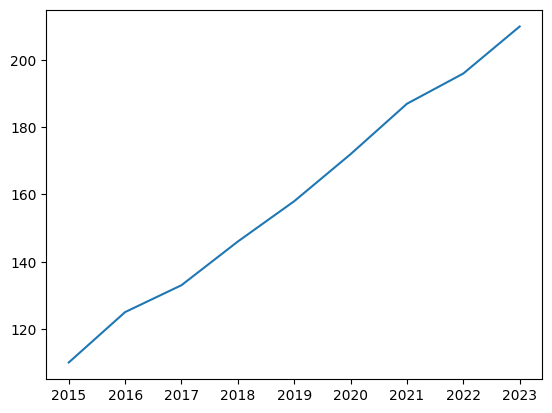

In [59]:
plt.plot(years, revenue)

In [60]:
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
feature_years_arr = []

i = 0

feature_years = 5

while i < feature_years:
    if(len(temp_input) > 3):
        x_input = array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_feature))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(y_hat[0][0])
        feature_years_arr.append(years[-1]+(i+1))
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, n_feature))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        feature_years_arr.append(years[-1]+(i+1))
        lst_output.append(y_hat[0][0])
        i += 1

lst_output = np.array(lst_output, dtype=float)
feature_years_arr = np.array(feature_years_arr)

print(lst_output)
print(feature_years_arr)      



[221.32095337 231.22790527 243.66947937 254.49734497 265.37930298]
[2024 2025 2026 2027 2028]


In [96]:
test_input = array([187,196,210])
test_temp_input = list(test_input)
test_input = test_input.reshape((1, n_steps, n_feature))

print(test_input)

test_yhat = model.predict(test_input, verbose=0)
test_temp_input.append(test_yhat[0][0])
print({'test_input' : test_input, 'test_yhat': test_yhat[0][0], 'temp_input_arr' : test_temp_input})
print(test_temp_input) 

test_input = array(test_temp_input[1:])
test_input_a = test_input.reshape((1, n_steps, n_feature))
test_y_hat = model.predict(test_input_a, verbose=0)
print({'test_input' : test_input, 'test_y_hat': test_y_hat[0][0]})

[[[187]
  [196]
  [210]]]
{'test_input': array([[[187],
        [196],
        [210]]]), 'test_yhat': 221.32095, 'temp_input_arr': [187, 196, 210, 221.32095]}
[187, 196, 210, 221.32095]
{'test_input': array([196.        , 210.        , 221.32095337]), 'test_y_hat': 231.2279}


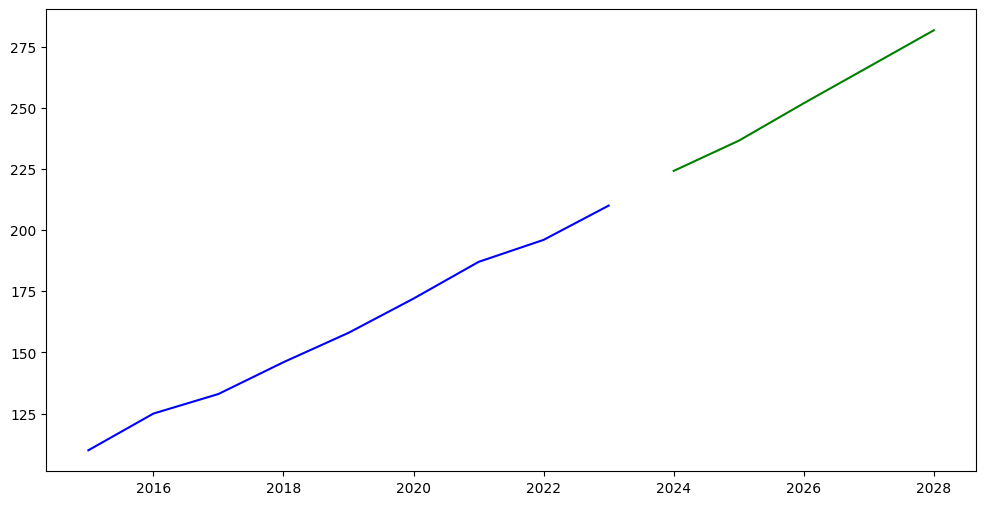

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(years, revenue, color='blue')
plt.plot(feature_years_arr, lst_output, color='green')